In [1]:
from sklearn import cluster, preprocessing, mixture

In [18]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df[[0, 10, 13]]
df.columns = [u'class', u'color', u'proline']
df.head(1)

,class,color,proline
0,1,5.64,1065


In [19]:
X = df[["color", "proline"]]
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

<Figure size 720x720 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

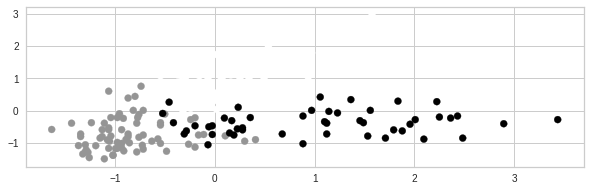

In [29]:
%matplotlib inline

x = X[:,0]
y = X[:,1]
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.scatter(x, y, c=df['class'])
plt.show

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b8819f198>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

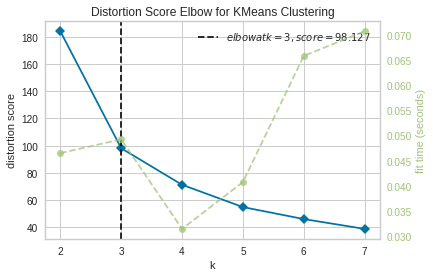

In [25]:
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

# The Elbow Method using Distortion
viz = KElbowVisualizer(cluster.KMeans(), k=(2, 8), metric='distortion')
viz.fit(X)
viz.poof()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81f6ea58>,
                     colors='yellowbrick', is_fitted='auto', model=None)

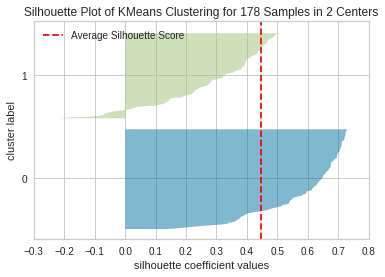

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81f15278>,
                     colors='yellowbrick', is_fitted='auto', model=None)

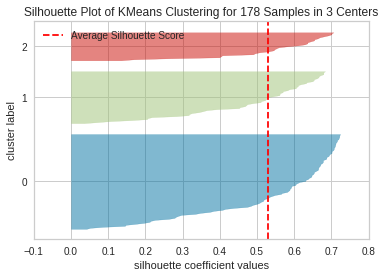

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81e285c0>,
                     colors='yellowbrick', is_fitted='auto', model=None)

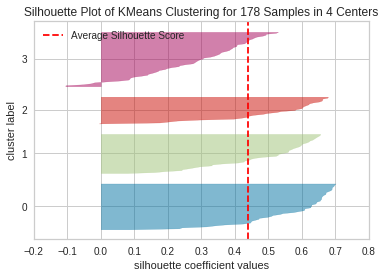

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b88f72710>,
                     colors='yellowbrick', is_fitted='auto', model=None)

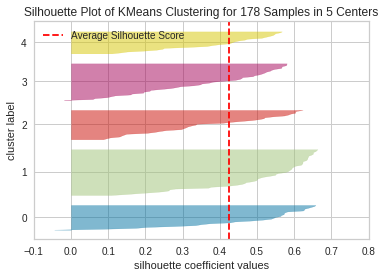

In [38]:
# https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
from yellowbrick.cluster import SilhouetteVisualizer

for k in [2, 3, 4, 5]:
    model = cluster.KMeans(k, random_state=42)
    viz = SilhouetteVisualizer(model, colors='yellowbrick')
    viz.fit(X)
    viz.poof() 

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81dd9438>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=400, model=None, random_state=None,
                     scoring='membership')

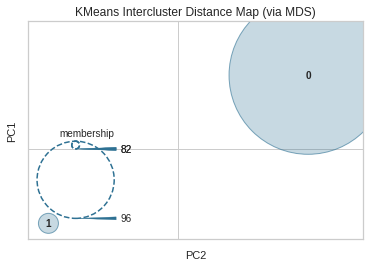

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81d59a58>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=400, model=None, random_state=None,
                     scoring='membership')

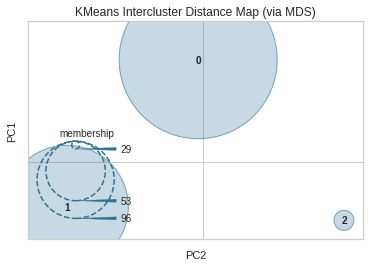

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81dc6da0>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=400, model=None, random_state=None,
                     scoring='membership')

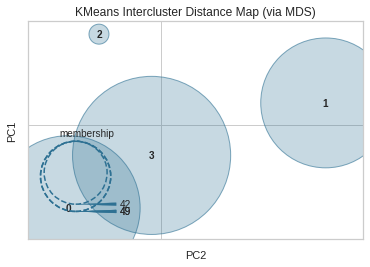

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b81c6c7b8>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=400, model=None, random_state=None,
                     scoring='membership')

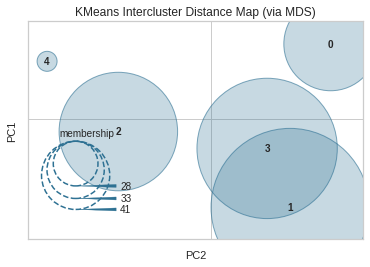

In [43]:
# https://www.scikit-yb.org/en/latest/api/cluster/icdm.html
from yellowbrick.cluster import InterclusterDistance

for k in [2, 3, 4, 5]:
    model = cluster.KMeans(k, random_state=42)
    viz = InterclusterDistance(model)
    viz.fit(X)
    viz.poof() 

<Figure size 720x720 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

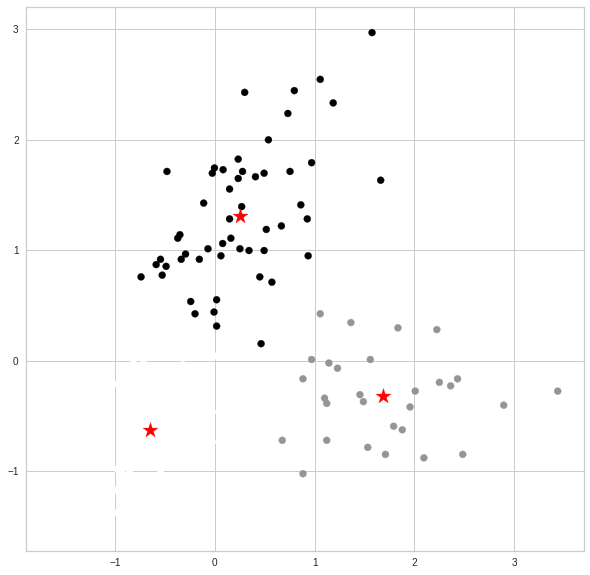

In [30]:
km = cluster.KMeans(n_clusters=3)
z_km = km.fit(X)

plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.show

In [31]:
ms = cluster.MeanShift(seeds=X)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None,
          seeds=array([[ 0.25171685,  1.01300893],
       [-0.29332133,  0.96524152],
       [ 0.26901965,  1.39514818],
       [ 1.18606801,  2.33457383],
       [-0.31927553, -0.03787401],
       [ 0.73186953,  2.23903902],
       [ 0.08301456,  1.72952002],
       [-0.00349944,  1.74544249],
       [ 0.06138606,  0.94931905],
       [ 0.93517742,  0.94931905],
       [ 0.299...
       [ 0.09599166, -0.22894363],
       [ 1.95604258, -0.42001326],
       [ 0.67563543, -0.72254016],
       [ 2.43186956, -0.16525376],
       [ 2.25019017, -0.19709869],
       [ 1.5580782 ,  0.0098934 ],
       [ 1.488867  , -0.37224585],
       [ 0.19115705, -0.7543851 ],
       [ 2.09446454, -0.88176485],
       [ 2.00795098, -0.27671104],
       [ 1.14281101, -0.02195154],
       [ 0.96978302,  0.0098934 ],
       [ 2.22423597,  0.28057537],
       [ 1.83492299,  0.29649784],
       [ 1.79166599, -0.

[[-0.6207637  -0.59667224]
 [ 1.49736922 -0.30032022]]


<Figure size 720x720 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

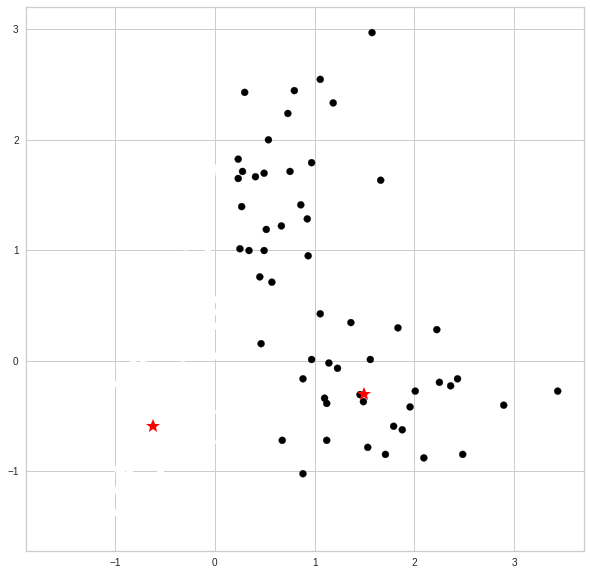

In [32]:
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=labels)
plt.plot(cluster_centers[0, 0], cluster_centers[0, 1], marker='*', c='red', markersize=14)
plt.plot(cluster_centers[1, 0], cluster_centers[1, 1], marker='*', c='red', markersize=14)
plt.show